In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
standard_scaler = StandardScaler()

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
column = ['age','trestbps','chol','thalach','oldpeak']
def scaler(df,column):
    a = standard_scaler.fit_transform(df[column])
    return a

In [22]:
a = pd.DataFrame(scaler(df,column),columns = column)

In [23]:
a

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244
...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373
300,1.503641,0.706843,-1.029353,-0.378132,2.036303
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373


In [26]:
df['age'] = a['age']
df['trestbps'] = a['trestbps']
df['chol'] = a['chol']
df['thalach']  = a['chol']
df['oldpeak']  = a['chol']

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,-0.256334,0,-0.256334,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,0.072199,0,0.072199,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,-0.816773,0,-0.816773,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,-0.198357,0,-0.198357,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,2.082050,1,2.082050,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-0.101730,1,-0.101730,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,0.342756,0,0.342756,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-1.029353,0,-1.029353,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-2.227533,1,-2.227533,1,1,3,0


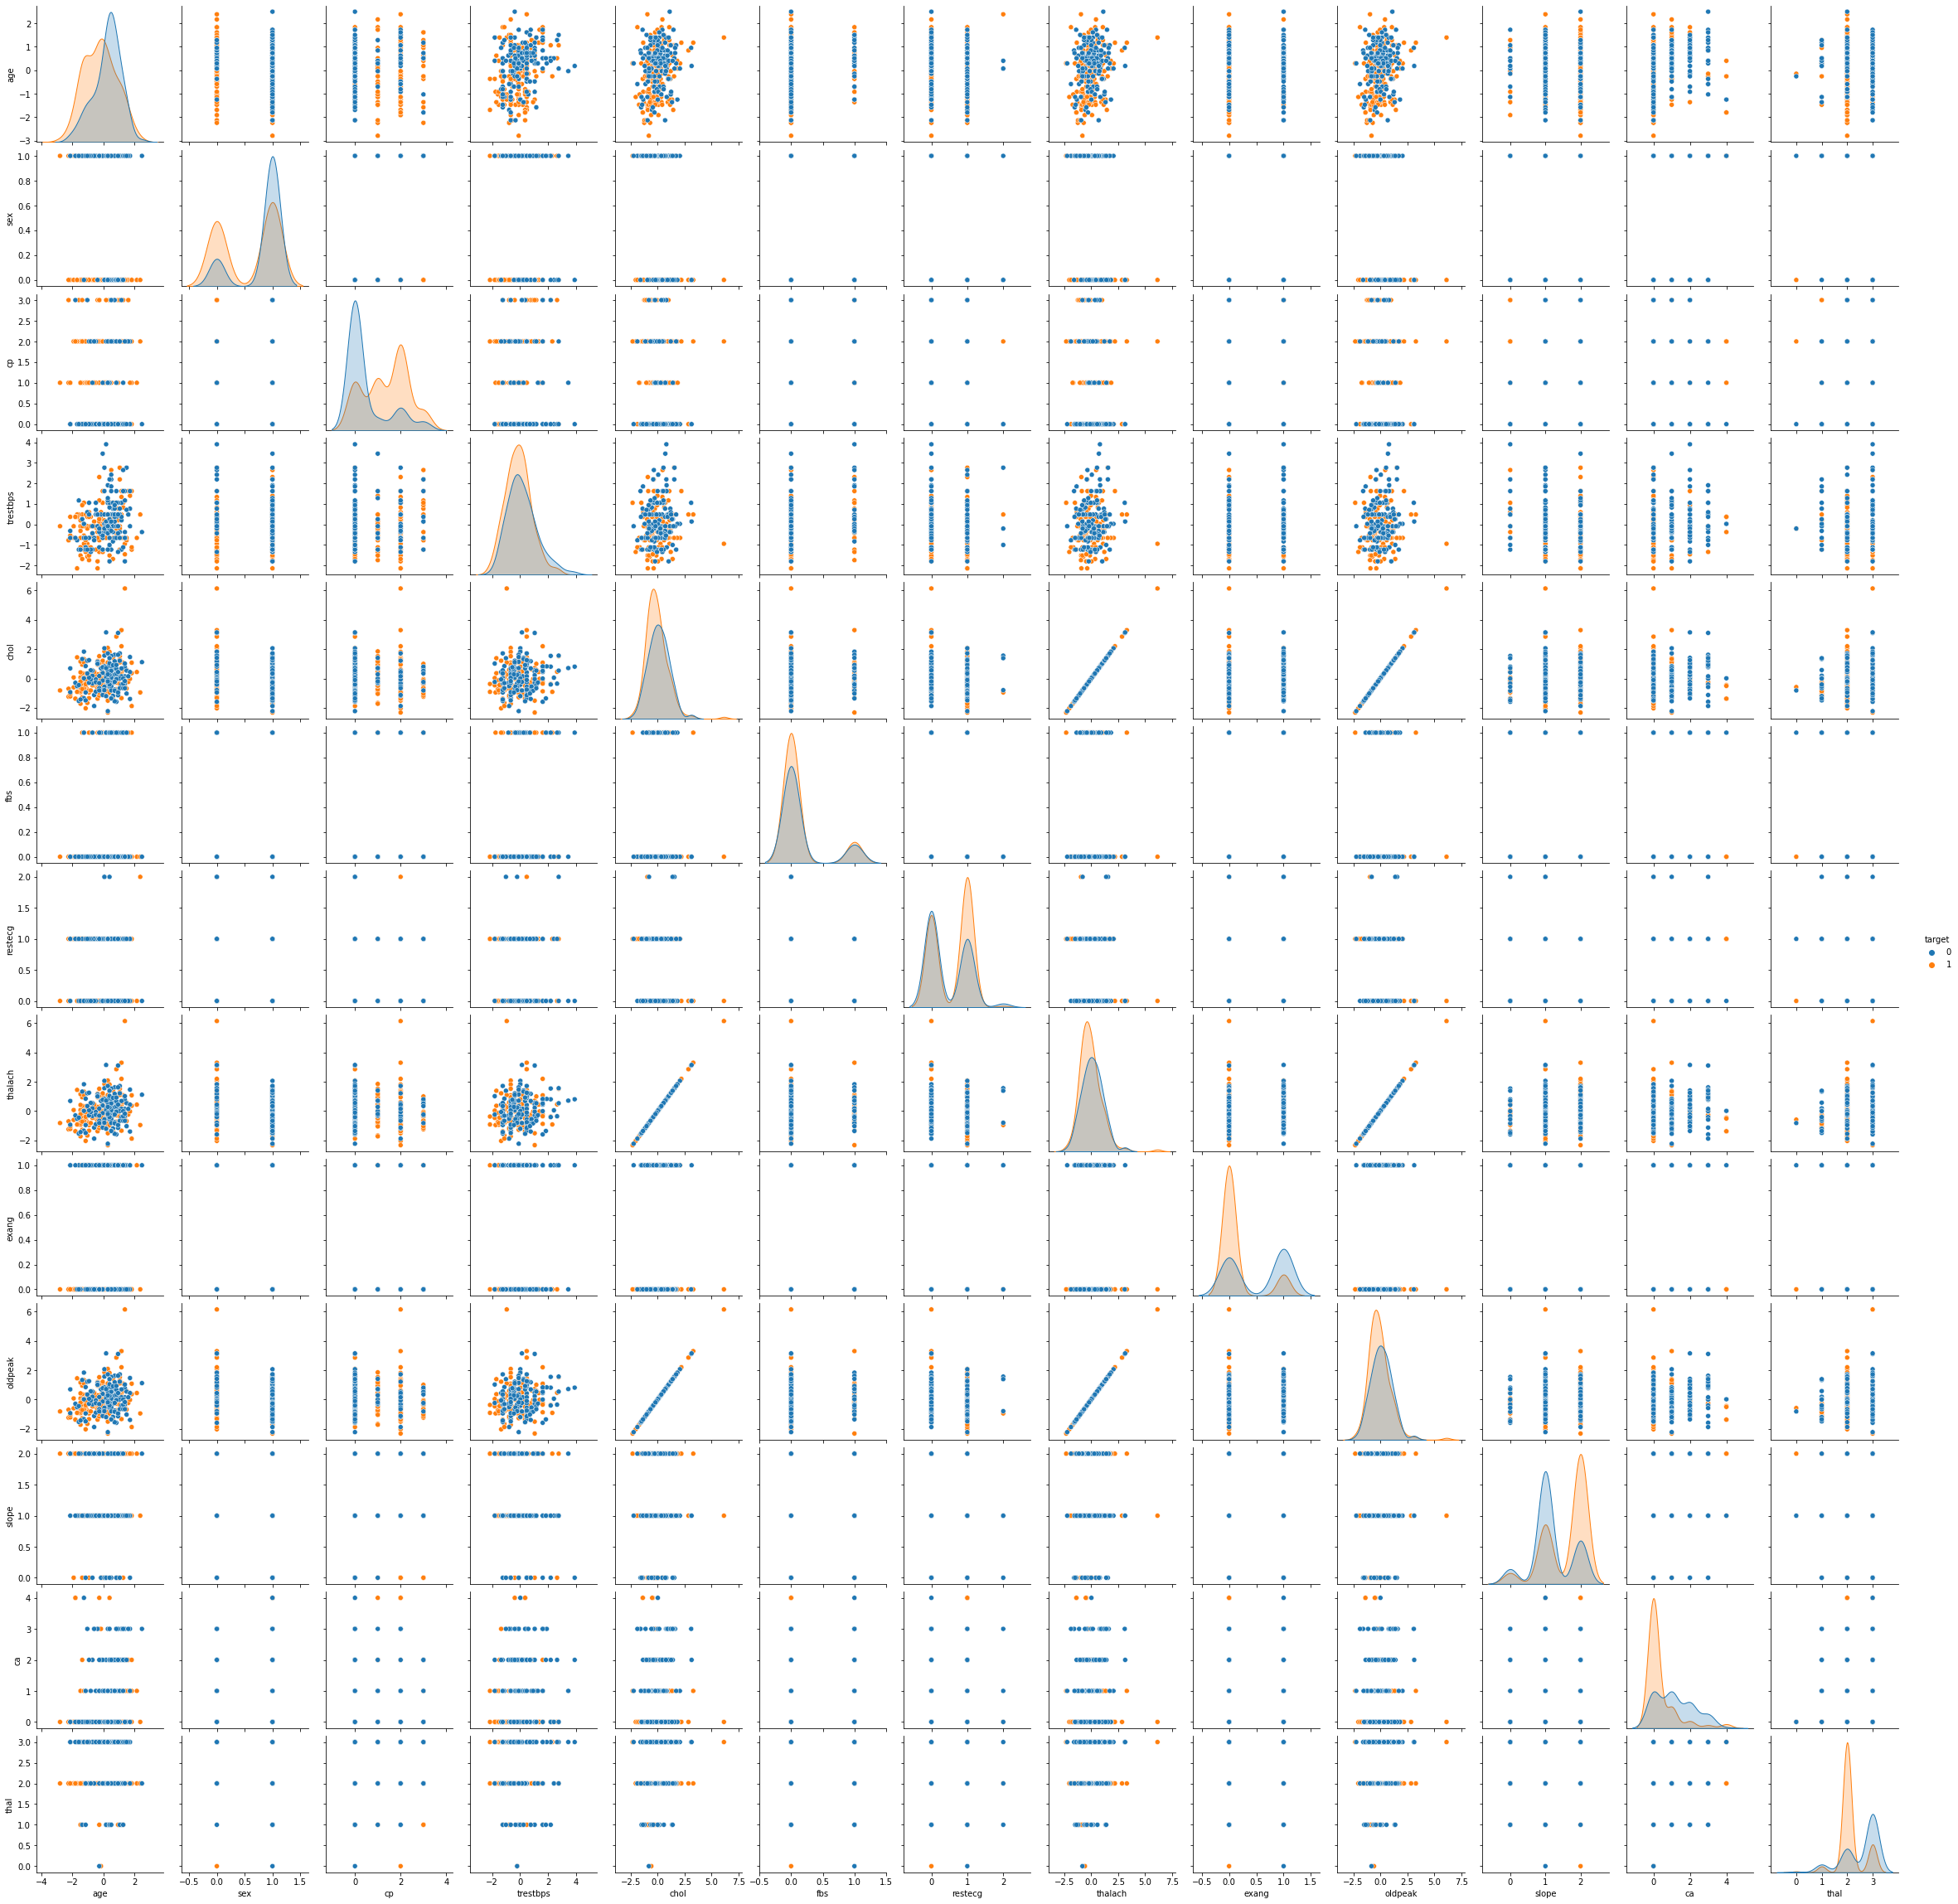

In [28]:
sns.pairplot(df,hue='target')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y_train = df['target']
x_train = df.drop(['target'], axis=1)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

In [57]:
def Models(Classifier,x,y,test):
    model = Classifier()
    model.fit(x,y)
    a = model.score(x,y)
    pred = model.predict(x_test)
    return a,pred

In [59]:
Models(RandomForestClassifier,x_train,y_train,x_test)

(1.0,
 array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64))

In [60]:
Models(LogisticRegression,x_train,y_train,x_test)

(0.8347107438016529,
 array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64))

In [62]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)